# EDA 2 - Working with the tags

In [2]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [3]:
# import cleaned dataframe

with open('data/df_cleaned.json', 'r') as f:
  data = json.load(f)

df = pd.DataFrame(data)

# check the data

df

,image_path,tags,uuid,length,price_length,cleaned_price
0,champkoi_data/18f755_A_32_Female_Kohaku_[Nogam...,['Kohaku'],18f755,32.0,7,14000.0
1,gckoi_data/d9a7dbc_HIGH_QUALITY_SAKAI_BLOODLIN...,"['kohaku', 'koi', 'Marukyu', 'nisai']",d9a7dbc,24.0,6,3500.0
2,gckoi_data/88ec869_ISA_KOHAKU_GUARANTEE_FEMALE...,"['isa', 'kohaku', 'koi', 'nisai']",88ec869,21.5,6,2500.0
3,gckoi_data/3a7df4e_DAINICHI_3SAI_FEMALE_KOHAKU...,"['dainichi', 'fall 2024', 'kohaku', 'koi', 'sa...",3a7df4e,27.0,6,3800.0
4,gckoi_data/cb26670_DAINICHI_BLOODLINE_KOHAKU_2...,"['dainichi', 'fall 2024', 'kohaku', 'koi', 'ni...",cb26670,20.0,5,600.0
...,...,...,...,...,...,...
3129,sacramentokoi_data/99a251_Yellow_Dragon_16″_–_...,"[Yellow, Dragon, Aokiya]",99a251,16.0,7,650.0
3130,sacramentokoi_data/e04f2c_Yellow_Dragon_17″_–_...,"[Yellow, Dragon, Aokiya]",e04f2c,17.0,7,600.0
3131,sacramentokoi_data/754a14_Yellow_Ginga_14″_–_2...,"[Yellow, Ginga]",754a14,14.0,7,375.0
3132,sacramentokoi_data/1cb46d_Yellow_Ginga_19″_–_2...,"[Yellow, Ginga]",1cb46d,19.0,9,1600.0


In [4]:
# count all instances of all tags

tags_dict = {}

for tag_list in df['tags']:
  if isinstance(tag_list, list):
    for tag in tag_list:
      tags_dict[tag] = tags_dict.get(tag, 0) + 1

tags_dict

{'Gin': 274,
 'Rin': 261,
 'Showa': 179,
 'showa': 1,
 'Karashigoi': 15,
 'Doitsu': 196,
 'Kogane': 6,
 'Ochiba': 46,
 'Benigoi': 41,
 'Ki': 28,
 'Matsuba': 136,
 'Hi': 54,
 'Utsuri': 113,
 'Tancho': 60,
 'Sanke': 234,
 'Goshiki': 37,
 'Shiro': 51,
 'Beni': 69,
 'Kumonryu': 31,
 'Maruten': 14,
 'Hariwake': 304,
 'Jumbo': 2,
 'Kage': 2,
 'Back': 1,
 'Diamond': 4,
 'Kohaku': 258,
 'Kujaku': 301,
 'Red': 2,
 'Chagoi': 43,
 'Asagi': 32,
 'Platinum': 26,
 'Kawarimono': 91,
 'Black': 3,
 'Matsukawabake': 6,
 'Gi': 1,
 'Saragoi': 1,
 'Kin': 22,
 'Cha': 1,
 'Sumi': 3,
 'Goromo': 44,
 'Shusui': 68,
 'Aka': 19,
 'Yamabuki': 60,
 'HI': 1,
 'Kikokuryu': 86,
 'Kigoi': 14,
 'sanke': 2,
 'rin': 1,
 'Copper': 1,
 'Kabuto': 1,
 'Ginrin': 8,
 'Mizuho': 2,
 'Ogan': 2,
 'Hutsuri': 1,
 'Nijikawa': 1,
 'Professional': 1,
 '7MM': 1,
 'Pellet-44': 1,
 'lbs': 1,
 'Aigoromo': 1,
 'Yamato': 33,
 'Nishiki': 37,
 'Butterfly': 133,
 'Penny"': 1,
 'Nezu': 6,
 'Ogon': 95,
 'Soragoi': 23,
 'Lemon': 2,
 'Hikari': 3,
 '

In [5]:
# create a dictionary from the tags_dict

tags_df = pd.DataFrame(tags_dict.items(), columns=['tags', 'count'])

tags_df = tags_df.sort_values(by='count', ascending=False)
tags_df

,tags,count
97,Single Fish,1871
95,Imported Koi,1582
96,Koi,1582
98,Single Koi,1582
100,All Hikari Koi,1017
...,...,...
70,Muji,1
128,Gold Crown,1
73,Root,1
74,Beer,1


In [6]:
# drop irrelevant tags

tags_df = tags_df[~tags_df['tags'].isin(['Single Fish', 'Imported Koi', 'Koi', 'Single Koi', 'Single Goldfish', 'Imported Goldfish',
                                         'Goldfish For Sale', '"Crystal\'s Featured Fish"', '4-5" Koi & Butterfly Koi'])]

In [7]:
# get the top 30

tags_df_30 = tags_df.sort_values(by='count', ascending=False).head(30)
tags_df_30

,tags,count
100,All Hikari Koi,1017
101,Hikarimoyo,842
112,Butterfly Koi,795
20,Hariwake,304
26,Kujaku,301
0,Gin,274
1,Rin,261
99,Gosanke,261
25,Kohaku,258
14,Sanke,234


In [8]:
# export tags_df to csv

tags_df.to_csv('data/tags_df.csv', index=False)

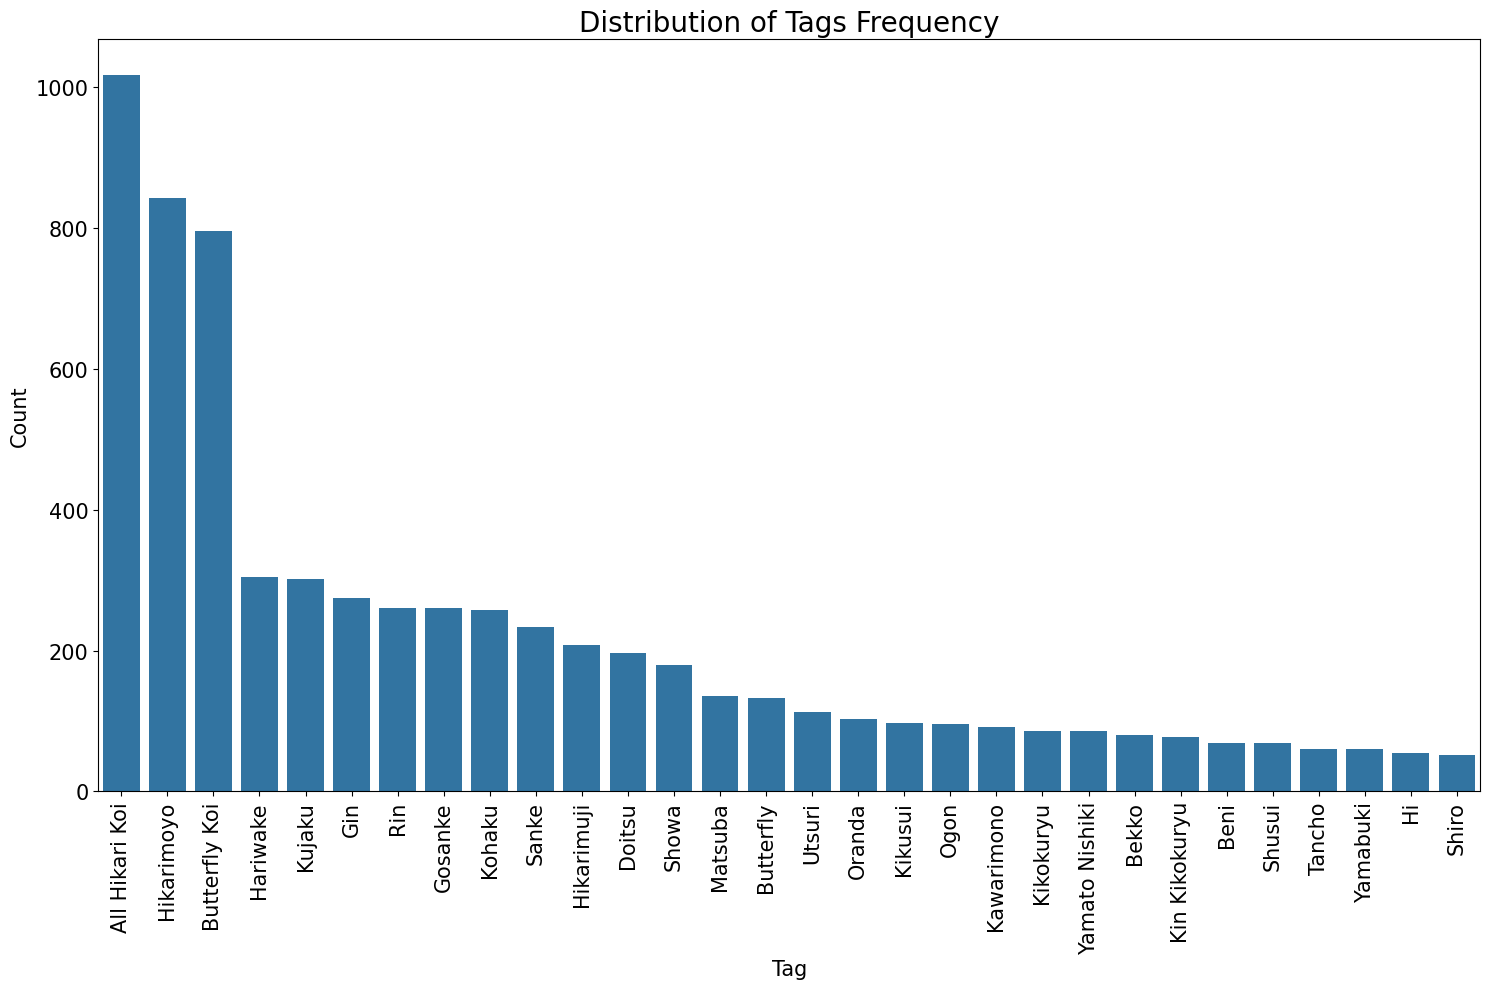

In [28]:
plt.figure(figsize=(15,10))
sns.barplot(x=tags_df_30['tags'], y=tags_df_30['count'])
plt.title('Distribution of Tags Frequency', fontsize=20)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Tag', fontsize=15)
plt.tight_layout()
plt.savefig('graphics/tags_frequency.png', transparent=True);

In [10]:
df[df['tags'].apply(lambda x: 'All Hikari Koi' in x)]

,image_path,tags,uuid,length,price_length,cleaned_price
843,nextdaykoi_data/62543bb1_3.5”_Imported_Armor_S...,"[All Hikari Koi, Hariwake, Hikarimoyo, Importe...",62543bb1,3.5,6,30.0
845,nextdaykoi_data/f6ec77bc_3.5”_Imported_Gin_Rin...,"[All Hikari Koi, Hariwake, Hikarimoyo, Importe...",f6ec77bc,3.5,6,30.0
846,nextdaykoi_data/0b5d40ad_3”_Imported_Gin_Rin_H...,"[All Hikari Koi, Hariwake, Hikarimoyo, Importe...",0b5d40ad,3.0,6,30.0
848,nextdaykoi_data/5a01311a_3”_Imported_Kikusui.jpg,"[All Hikari Koi, Hikarimoyo, Imported Koi, Kik...",5a01311a,3.0,6,30.0
862,nextdaykoi_data/83c051ad_7”_Imported_Gin_Matsu...,"[All Hikari Koi, Butterfly Koi, Hikarimuji, Im...",83c051ad,7.0,7,340.0
...,...,...,...,...,...,...
2698,nextdaykoi_data/c816b4eb_7”_Imported_Kikusui_B...,"[All Hikari Koi, Butterfly Koi, Hikarimoyo, Im...",c816b4eb,7.0,14,136.0
2703,nextdaykoi_data/68edabd0_5.5”_Imported_Gin_Rin...,"[All Hikari Koi, Hariwake, Hikarimoyo, Importe...",68edabd0,5.5,12,32.0
2704,nextdaykoi_data/934b39e8_5.5”_Imported_Kujaku.jpg,"[All Hikari Koi, Hikarimoyo, Imported Koi, Koi...",934b39e8,5.5,12,32.0
2707,nextdaykoi_data/fd039ce7_4.5”_Imported_Gin_Rin...,"[4-5"" Koi & Butterfly Koi, All Hikari Koi, Har...",fd039ce7,4.5,12,28.0


In [11]:
# check how many observations have 'Kohaku' in the tags

df[df['tags'].apply(lambda x: 'Kohaku' in x)]

,image_path,tags,uuid,length,price_length,cleaned_price
0,champkoi_data/18f755_A_32_Female_Kohaku_[Nogam...,['Kohaku'],18f755,32.0,7,14000.0
62,grandkoi_data/c424bc_Kohaku.jpeg,[Kohaku],c424bc,28.0,9,9999.0
84,grandkoi_data/f25237_Kohaku.jpeg,[Kohaku],f25237,29.0,10,15999.0
85,grandkoi_data/cebd0a_Kohaku.jpeg,[Kohaku],cebd0a,31.0,10,20999.0
86,grandkoi_data/54fe41_Kohaku.jpeg,[Kohaku],54fe41,30.0,10,19999.0
...,...,...,...,...,...,...
2989,sacramentokoi_data/569caf_Kohaku_21″_–_2412972...,[Kohaku],569caf,21.0,9,3200.0
2990,sacramentokoi_data/d60117_Kohaku_25″_–_2406671...,[Kohaku],d60117,25.0,9,1800.0
3037,sacramentokoi_data/16a8f4_Pearl_Gin_Rin_Kohaku...,"[Pearl, Gin, Rin, Kohaku]",16a8f4,17.0,7,575.0
3107,sacramentokoi_data/bf71be_Tancho_Kohaku_16″_–_...,"[Tancho, Kohaku]",bf71be,16.0,7,550.0


In [12]:
# check how many observations have 'Sanke' in the tags

df[df['tags'].apply(lambda x: 'Sanke' in x)]

,image_path,tags,uuid,length,price_length,cleaned_price
22,grandkoi_data/b1c670_Tancho Sanke.jpeg,"[Tancho, Sanke]",b1c670,22.0,9,3499.0
23,grandkoi_data/58e2f4_Tancho Sanke.jpeg,"[Tancho, Sanke]",58e2f4,22.0,9,2999.0
59,grandkoi_data/0a839c_Sanke-.jpeg,[Sanke],0a839c,34.0,10,32999.0
157,grandkoi_data/474f2b_Tancho Sanke.jpeg,"[Tancho, Sanke]",474f2b,24.0,9,3499.0
174,grandkoi_data/040c9c_Sanke.jpeg,[Sanke],040c9c,28.0,9,8999.0
...,...,...,...,...,...,...
3057,sacramentokoi_data/e53be9_Sanke_19″_–_24036325...,[Sanke],e53be9,19.0,7,850.0
3058,sacramentokoi_data/b3d771_Sanke_19″_–_24066224...,[Sanke],b3d771,19.0,9,1900.0
3059,sacramentokoi_data/5146b2_Sanke_20″_–_24036325...,[Sanke],5146b2,20.0,7,900.0
3060,sacramentokoi_data/3a20b7_Sanke_21″_–_24036325...,[Sanke],3a20b7,21.0,9,1200.0


In [13]:
# check how many observations have 'Showa' in the tags

df[df['tags'].apply(lambda x: 'Showa' in x)]

,image_path,tags,uuid,length,price_length,cleaned_price
13,grandkoi_data/12a49e_High Quality Gin Rin Show...,"[Gin, Rin, Showa]",12a49e,32.0,10,34999.0
26,grandkoi_data/fa49a7_Gin Rin Showa.jpeg,"[Gin, Rin, Showa]",fa49a7,17.0,7,699.0
27,grandkoi_data/3096cf_Gin Rin Showa.jpeg,"[Gin, Rin, Showa]",3096cf,17.0,9,1299.0
31,grandkoi_data/f42319_Gin Rin Maruten Showa.jpeg,"[Gin, Rin, Maruten, Showa]",f42319,24.0,9,3499.0
32,grandkoi_data/45d859_Gin Rin Showa.jpeg,"[Gin, Rin, Showa]",45d859,15.0,7,649.0
...,...,...,...,...,...,...
3089,sacramentokoi_data/d32e7b_Showa_21″_–_24033524...,[Showa],d32e7b,21.0,9,1600.0
3090,sacramentokoi_data/705e77_Showa_21″_–_24033525...,[Showa],705e77,21.0,9,1700.0
3091,sacramentokoi_data/68c40e_Showa_21″_–_24107124...,[Showa],68c40e,21.0,9,2300.0
3114,sacramentokoi_data/10e266_Tancho_Showa_15″_–_2...,"[Tancho, Showa]",10e266,15.0,7,375.0


In [14]:
# see if there are any overlaps in Kohaku, Sanke and Showa, where a picture has more than 1 of these tags

print(df[df['tags'].apply(lambda x: 'Showa' in x)]['tags'].apply(lambda x: 'Sanke' in x).sum())
print(df[df['tags'].apply(lambda x: 'Showa' in x)]['tags'].apply(lambda x: 'Kohaku' in x).sum())
print(df[df['tags'].apply(lambda x: 'Sanke' in x)]['tags'].apply(lambda x: 'Kohaku' in x).sum())

0
0
0


- there are no overlaps in tags, so they are mutually exclusive, so I can create separate train and test datasets without pictures being in multiple classes

In [15]:
# double check for duplicated images

df[['image_path']].duplicated().sum()

np.int64(0)

In [16]:
# tuples of image_path and labels, train-test-split those, create tensorflow dataset